Here we are going to show how the BEC can be evolved in the comoving frame. We start by initialising a BEC with a gaussian potential a bit forward in the computatinal domain 

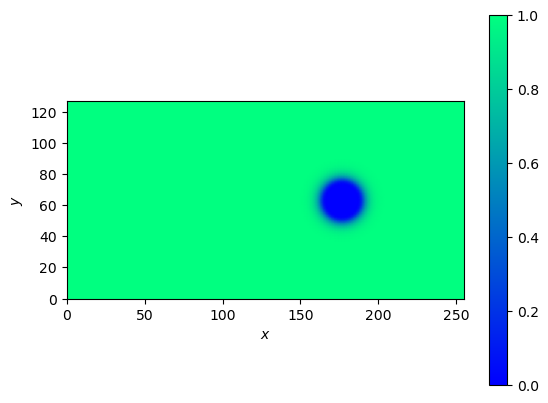

In [1]:
import sys
sys.path.append('/Users/jonasronning/Documents/Work/Numerics/Old Projects/ComFiT')

import numpy as np
import matplotlib.pyplot as plt
import comfit as cf

bec = cf.BEC(2,xRes=256,yRes=128,gamma=0,dt=0.1)

bec.V0 = bec.calc_gaussian_stirring_potential(10,4,[bec.xmid+50,bec.ymid,bec.zmid])

bec.set_initial_condition_Thomas_Fermi()
bec.evolve_relax_BEC(100)

bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()


Now we sett bec.gamma to be a zero inside the computational domain and 1 on the edges and introduce a bit of noise to the wavefunction

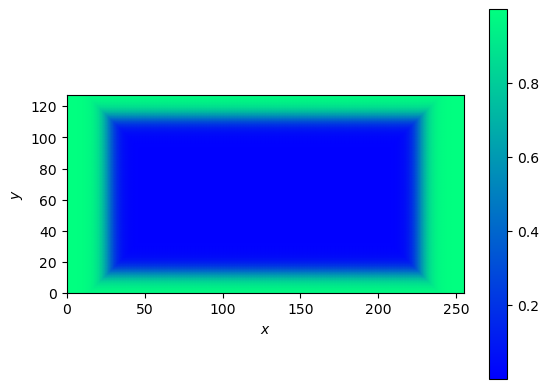

In [2]:
bec.set_dissipative_frame(wx=100,wy=50)

bec.plot_field(bec.gamma,cmap_symmetric=False,colormap = 'winter')
plt.show()

bec.psi += (0.1*np.random.randn(bec.xRes,bec.yRes)+ 0.1*np.random.randn(bec.xRes,bec.yRes,)*(1j))*np.abs(bec.psi)**2

Now we set the velocity in the x direction to 0.8 and evolve the system in the comoving frame. Notice that the frame is not able to remove all the vortices before they are recycled in the incoming flow. We also uses the function bec.calc_vortex_nodes() to find the vortices.

[62.07155918780322, 250.9599742543639, 3.2053751800897405, 146.03416328698245, 129.00704048158866, 138.92384600654745, 141.03572687587703, 154.8153547943881, 144.95113392730187, 131.99912225854985, 91.24468896530449, 3.1917308664601474, 134.78761887061683] [3.957106361420774, 24.9221597501726, 126.88729139382535, 43.143380215579526, 59.92358346390794, 57.01427748058315, 44.16337508720532, 126.70316180072719, 62.19085326839148, 56.16054178011304, 68.95583013861135, 0.0671617420384666, 69.1733818871281]
[154.83814608518688, 148.16829576792006, 16.87543129178691, 124.94192514014463, 107.00328301550292, 119.99676809966914, 86.88277726372743, 134.9400668710176, 80.95685465604444, 80.09345956893029, 136.88272329575184, 107.0022934894147, 92.1280341616071] [42.91843224213296, 30.99676229081107, 6.106980482862221, 39.858820928398124, 126.88287256411942, 36.11513543718463, 52.09805176074556, 34.20686221204867, 55.85132280587547, 51.0540908920404, 31.145276576420933, 0.07322156589539228, 66.8241

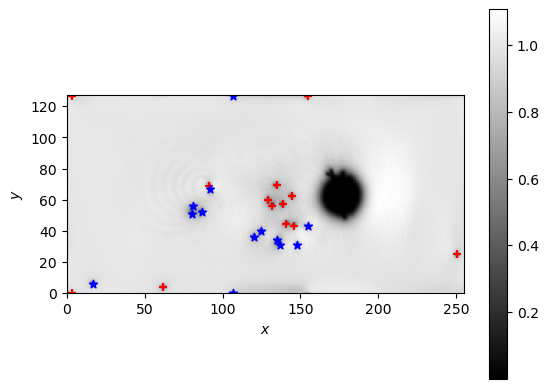

In [3]:


vel_x = 0.45

Area = [bec.xmid -107,bec.xmid+107,bec.ymin -57,bec.ymid +57]

timesteps = int(10/bec.dt)

t_max = 8000

while bec.t < t_max+30:
    bec.evolve_comoving_dGPE(timesteps,vel_x,method='ETD4RK')

    nodes = bec.calc_vortex_nodes()

    bec.vortex_remover(nodes,Area)
    

ax=bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'gray')
bec.plot_vortices(nodes,ax)
plt.show()
